# Keras For Image Recognition

Build and train a CNN+MLP deep learning model with Keras with two followings for MNIST dataset:

In [1]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Creating the Models

In [2]:
# Baseline without dropout or batch normalization
def base_mnist_cnn(x_train, y_train, epochs=10, batch_size=100):
    model = keras.Sequential()
        
    model.add(keras.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation="softmax"))
        
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    return model, history

def mnist_cnn(x_train, y_train, epochs=10, batch_size=100):
    model = keras.Sequential()
        
    model.add(keras.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation="softmax"))
        
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    return model, history

## Testing the Models

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


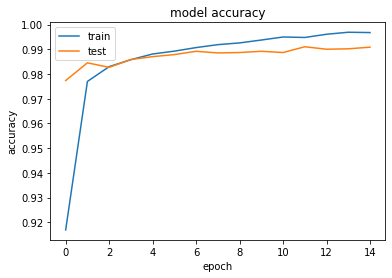

In [3]:
base_mnist, base_history = base_mnist_cnn(x_train, y_train, batch_size=128, epochs=15)

# list all data in history
print(base_history.history.keys())

# summarize history for accuracy
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
score = base_mnist.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03530660271644592
Test accuracy: 0.9902999997138977


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


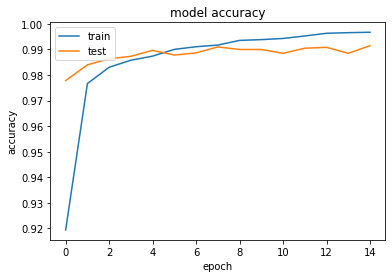

In [4]:
mnist_cnn_model, model_history = base_mnist_cnn(x_train, y_train, batch_size=128, epochs=15)

# list all data in history
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
score = mnist_cnn_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03643619641661644
Test accuracy: 0.9900000095367432
